In [2]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import pandas as pd


In [3]:
with open('data/text_structured/accumulation-accounts-2008-2023-provisional.csv') as f:
    text = f.read()

In [4]:
char_freq = Counter(text)
char_freq.most_common(5)

[('0', 384775), ('n', 340342), (' ', 325601), ('i', 310935), ('a', 288832)]

In [5]:
char_entropy = 0

for freq in char_freq.values():
    prob = freq / len(text)
    char_entropy -= prob * np.log2(prob)

max_char_entropy = np.log2(len(char_freq))

total_char_entropy = len(text) * char_entropy

print(f'Entropy: {char_entropy:.2f} bits per character')
print(f'Max Entropy: {max_char_entropy:.2f} bits per character')
print(f'{char_entropy / max_char_entropy * 100:.0f}% of maximum entropy')
print(f'Total Entropy: {total_char_entropy:.2f} bits')

Entropy: 4.80 bits per character
Max Entropy: 5.98 bits per character
80% of maximum entropy
Total Entropy: 20646991.08 bits


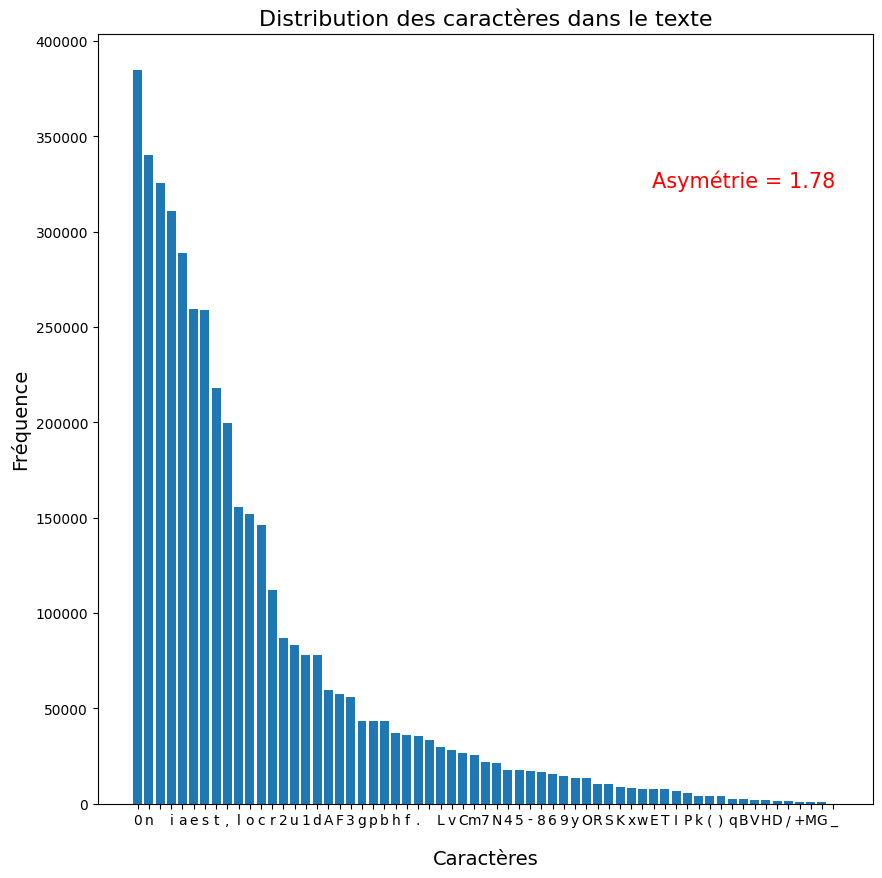

In [ ]:
chars, freqs = zip(*char_freq.most_common()) # ChatGPT
char_distribution_skewness = skew(freqs) # ChatGPT

plt.figure(figsize=(10, 10))
plt.bar(chars, freqs)
plt.title("Distribution des caractères dans le texte", fontsize=16)
plt.ylabel("Fréquence", fontsize=14)
plt.xlabel("Caractères", fontsize=14)
plt.text(
    x=0.7*plt.xlim()[1],
    y=0.8*plt.ylim()[1],
    s=f"Asymétrie = {char_distribution_skewness:.2f}",
    fontsize=15,
    color="red"
) # ChatGPT
plt.show()

In [70]:
df = pd.read_csv('data/text_structured/accumulation-accounts-2008-2023-provisional.csv')
substring_freq = df.melt()['value'].value_counts() # ChatGPT

In [71]:
substring_entropy = 0

for freq in substring_freq:
    prob = freq / substring_freq.sum()
    substring_entropy -= prob * np.log2(prob)

max_substring_entropy = np.log2(len(substring_freq))
 
total_substring_entropy = substring_freq.sum() * substring_entropy

print(f'Entropy: {substring_entropy:.2f} bits per substring')
print(f'Max Entropy: {max_substring_entropy:.2f} bits per substring')
print(f'{substring_entropy / max_substring_entropy * 100:.0f}% of maximum entropy')
print(f'Total Entropy: {total_substring_entropy:.2f} bits')

Entropy: 7.93 bits per substring
Max Entropy: 13.12 bits per substring
60% of maximum entropy
Total Entropy: 1846298.08 bits


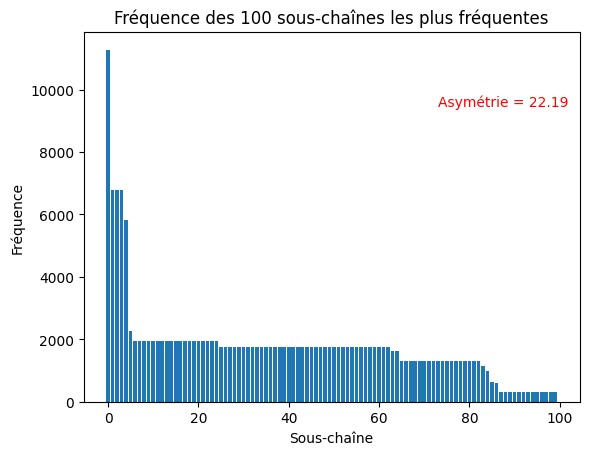

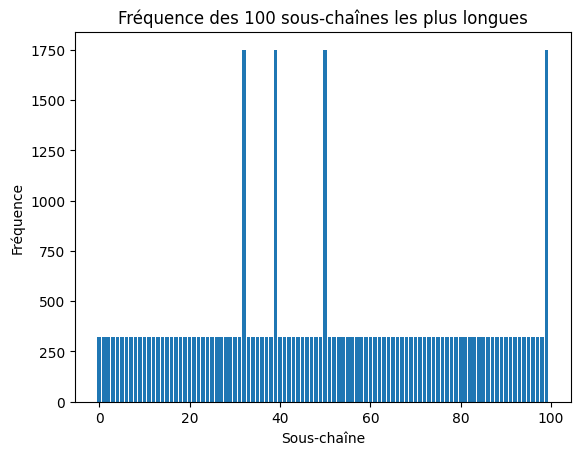

In [78]:
substring_distribution_skewness = skew(list(substring_freq))

plt.bar(range(100), substring_freq[:100].values)
plt.title('Fréquence des 100 sous-chaînes les plus fréquentes')
plt.xlabel('Sous-chaîne')
plt.ylabel('Fréquence')
plt.text(
    x=0.7*plt.xlim()[1],
    y=0.8*plt.ylim()[1],
    s=f"Asymétrie = {substring_distribution_skewness:.2f}",
    color="red"
) # ChatGPT
plt.show()

substring_freq_sorted_by_len = substring_freq.sort_index(key=lambda x: -x.str.len()) # ChatGPT

plt.bar(range(100), substring_freq_sorted_by_len[:100].values)
plt.title('Fréquence des 100 sous-chaînes les plus longues')
plt.xlabel('Sous-chaîne')
plt.ylabel('Fréquence')
plt.show()